In [1]:
import pandas as pd

In [2]:
#spreadsheet = pd.read_csv('/Users/G/Montorship dataset Meteorology/1.csv')

In [3]:
#df = []
#for i in range(1,3):
#    df.append(pd.read_csv(f'/Users/G/Montorship dataset Meteorology/{i}.csv'))

In [4]:
#Importing data
#We have 40 folders 'YYYY' (years 1980-2019)
#Each folder contains a 365*24 datasets with name 'YYYY_MM_DD_HH_UTC_County_Mean_Meteorology.csv'

#For simplicity we ignore leap years

YYYY= []
for year in range(1980,2020):
    YYYY.append(str(year))

DD= [
    '01','02','03','04','05','06','07','08','09','10',
    '11','12','13','14','15','16','17','18','19','20',
    '21','22','23','24','25','26','27','28','29','30',
    '31'
]

#We introduce a dictionary month-days
MM= {'01':DD,
     '02':DD[0:28],
     '03':DD,
     '04':DD[0:30],
     '05':DD,
     '06':DD[0:30],
     '07':DD,
     '08':DD,
     '09':DD[0:30],
     '10':DD,
     '11':DD[0:30],
     '12':DD    
}

#We finally introduce a list of hours
HH= [
    '01','02','03','04','05','06','07','08','09','10',
    '11','12','13','14','15','16','17','18','19','20',
    '21','22','23'
]

In [5]:
names = []

for year in YYYY:
    for month in list(MM.keys()):
        for day in list(MM[month]):
            for hour in HH:
                names.append(f'/Users/G/Mentorship_dataset_Meteorology/historic/{year}/{year}_{month}_{day}_{hour}_UTC_County_Mean_Meteorology.csv')
print(names[0])

/Users/G/Mentorship_dataset_Meteorology/historic/1980/1980_01_01_01_UTC_County_Mean_Meteorology.csv


In [6]:
df_list = []
for year in YYYY:
    for month in list(MM.keys()):
        for day in list(MM[month]):
            for hour in HH:
                # leggi il file CSV in un nuovo DataFrame
                df = pd.read_csv(f'/Users/G/Mentorship_dataset_Meteorology/historic/{year}/{year}_{month}_{day}_{hour}_UTC_County_Mean_Meteorology.csv')
                # crea un nuovo DataFrame che contiene solo le colonne che ti interessano
                new_df = pd.DataFrame({
                    "date": [f"{year}-{month}-{day}-{hour}"] * len(df),
                    "year": [f"{year}"] * len(df),
                    "month": [f"{month}"] * len(df),
                    "T2": df["T2"],
                    "Q2": df["Q2"],
                    "U10": df["U10"],
                    "V10": df["V10"],
                    "SWDOWN": df["SWDOWN"],
                    "GLW": df["GLW"]
                })
                # aggiungi il nuovo DataFrame alla lista
                df_list.append(new_df)

In [7]:
#df = []
#for year in YYYY:
#    for month in list(MM.keys()):
#        for day in list(MM[month]):
#            for hour in HH:
#                df.append(pd.read_csv(f'/Users/G/Mentorship_dataset_Meteorology/historic/{year}/{year}_{month}_{day}_{hour}_UTC_County_Mean_Meteorology.csv'))

In [8]:
#These are 40*365*24 data frames
#We now average over the locations (FIPS) and create new dfs with columns T and Q

In [9]:
# Every dataset is specific of a single hour
# Our goal is obtain datasets for months -> We have to make averages
# Firs we would like to glue all the datasets in a single one

#big_df = pd.concat(df_list).reset_index()

#concatenating all the dframes makes python's kernel die
#Let's try do this gradually

#An idea is reducing the size of each data frame by taking the average over the df, i.e. the average over the locations (FIPS)

newlist_df= []
for i in range(0,len(df_list)):
    newlist_df.append(df_list[i].groupby(by=["date","month"]).agg(T=("T2","mean"),Q=("Q2","mean")).reset_index())

In [10]:
#Then we try to concatdnate the new datasets
final_df= pd.concat(newlist_df).reset_index()

In [11]:
df_list[0].groupby(by=["date","month"]).agg(T=("T2","mean"),Q=("Q2","mean")).reset_index()

,date,month,T,Q
0,1980-01-01-01,01,274.171271,0.003482


In [15]:
final_df= pd.concat(newlist_df).reset_index()

In [16]:
final_df

,index,date,month,T,Q
0,0,1980-01-01-01,01,274.171271,0.003482
1,0,1980-01-01-02,01,273.727671,0.003432
2,0,1980-01-01-03,01,273.328044,0.003386
3,0,1980-01-01-04,01,272.976023,0.003344
4,0,1980-01-01-05,01,272.642860,0.003305
...,...,...,...,...,...
335795,0,2019-12-31-19,12,276.668378,0.002874
335796,0,2019-12-31-20,12,276.973932,0.002919
335797,0,2019-12-31-21,12,276.896647,0.002957
335798,0,2019-12-31-22,12,276.094791,0.002979


In [17]:
#We then export this df
final_df.to_csv('historical.csv')

In [22]:
final_df.groupby(by="date").agg({"T":"mean","Q":"mean"}).to_csv('averaged.csv')
df_averaged=final_df.groupby(by="date").agg({"T":"mean","Q":"mean"}).copy()

<AxesSubplot:title={'center':'T'}, xlabel='date'>

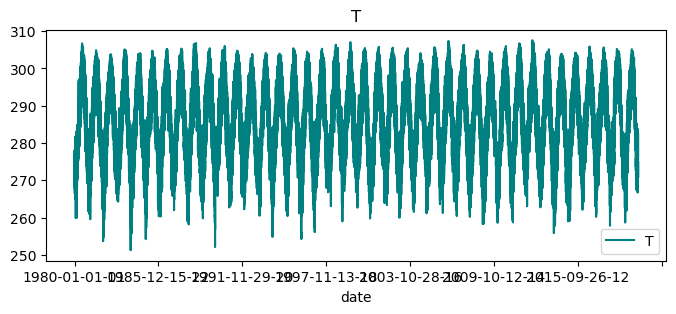

In [25]:
df_averaged[["T"]].plot.line(figsize=(8,3), color="teal",title="T")